In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score

In [2]:
file_path = r"C:\Users\mipo\OneDrive - Hillyard, Inc\Desktop\GitHub\hillyard_routing_analysis\Resources\1520.csv"
data = pd.read_csv(file_path)

In [3]:
selected_columns = ['Latitude', 'Longitude']
X = data[selected_columns]
#, 'Total Orders', 'Total Deliveries', 'Avg. Revenue' - removed from range

In [4]:
X.fillna(0, inplace=True)

C:\Users\mipo\AppData\Local\Temp\ipykernel_15844\2534066105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [5]:
#determine the range of the amount of clusters to analyze
k_values = range(10,21)
ch_scores = []

for k in k_values:
    kmeans =  KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    ch_score = calinski_harabasz_score(X, labels)
    ch_scores.append(ch_score)

C:\Users\mipo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mipo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\mipo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mipo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

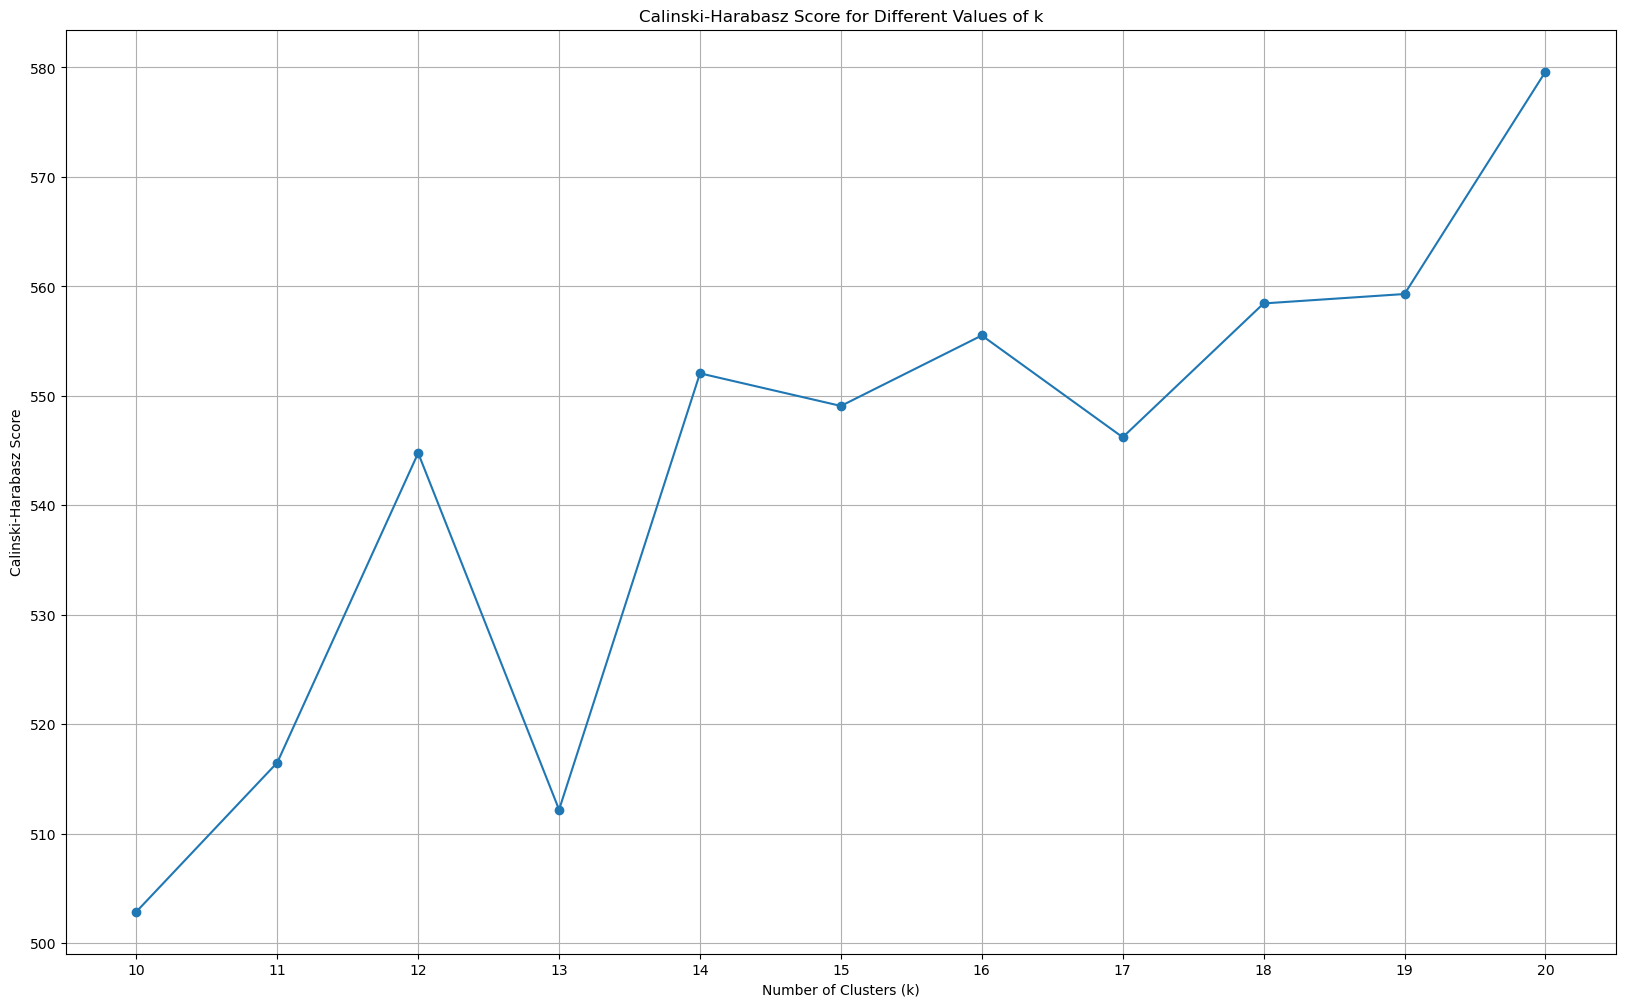

In [6]:
plt.figure(figsize=(20, 12))
plt.plot(k_values, ch_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score for Different Values of k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [7]:
k = k_values[np.argmax(ch_scores)]
k

20

In [8]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

C:\Users\mipo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mipo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


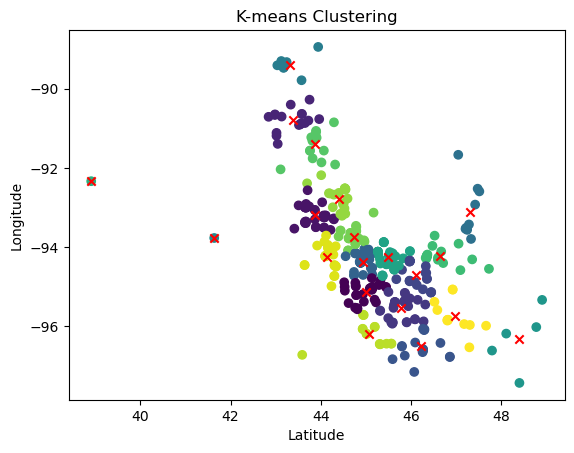

In [9]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.title('K-means Clustering')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [10]:
print("Cluster Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1}: Latitude = {centroid[0]}, Longitude = {centroid[1]}")

Cluster Centroids:
Cluster 1: Latitude = 44.9999434054054, Longitude = -95.1275812972973
Cluster 2: Latitude = 43.8823822745098, Longitude = -93.17931990196078
Cluster 3: Latitude = 43.377586055555554, Longitude = -90.79958205555556
Cluster 4: Latitude = 45.783845710526315, Longitude = -95.5353327631579
Cluster 5: Latitude = 46.11951795652174, Longitude = -94.69819408695652
Cluster 6: Latitude = 46.23266915, Longitude = -96.5029828
Cluster 7: Latitude = 44.927676886363635, Longitude = -94.36634218181818
Cluster 8: Latitude = 47.3019895, Longitude = -93.1061231
Cluster 9: Latitude = 43.308251875, Longitude = -89.392058625
Cluster 10: Latitude = 41.637833, Longitude = -93.767222
Cluster 11: Latitude = 48.4026282, Longitude = -96.3120068
Cluster 12: Latitude = 45.500494, Longitude = -94.2369597118644
Cluster 13: Latitude = 38.909502, Longitude = -92.333628
Cluster 14: Latitude = 46.64793683333333, Longitude = -94.21933477777777
Cluster 15: Latitude = 43.870116611111115, Longitude = -91.39

In [11]:
cluster_centroids_df = pd.DataFrame(centroids, columns=X.columns)
cluster_centroids_df

,Latitude,Longitude
0,44.999943,-95.127581
1,43.882382,-93.179320
2,43.377586,-90.799582
3,45.783846,-95.535333
4,46.119518,-94.698194
5,46.232669,-96.502983
6,44.927677,-94.366342
7,47.301989,-93.106123
8,43.308252,-89.392059
9,41.637833,-93.767222


In [12]:
cluster_counts = pd.Series(labels).value_counts().sort_index()
cluster_centroids_df['Location Count'] = cluster_counts.values
cluster_centroids_df

,Latitude,Longitude,Location Count
0,44.999943,-95.127581,37
1,43.882382,-93.179320,51
2,43.377586,-90.799582,18
3,45.783846,-95.535333,38
4,46.119518,-94.698194,23
5,46.232669,-96.502983,20
6,44.927677,-94.366342,44
7,47.301989,-93.106123,10
8,43.308252,-89.392059,8
9,41.637833,-93.767222,1


In [13]:
data['Cluster'] = labels
data

,Sold To ID,Sold To Customer,Ship To ID,Ship To Customer,Ship To Address,Ship To City,Ship To State,Ship To Zip,Full Address,Latitude,Longitude,Total Orders,Sold_To_AccountId_Alt,Ship_To_AccountId_Alt,Cluster
0,201100,ISD #6051 GOODHUE CO EDUCATIO,201100,ISD #6051 GOODHUE CO EDUCATIO,395 Guernsey Ln,Red Wing,MN,55066,"395 Guernsey Ln Red Wing MN, 55066",44.536762,-92.517050,4,201100,201100,16
1,201902,3M COMPANY NEW ULM,401715,3M COMPANY BLDG 01,1700 N Minnesota St,New Ulm,MN,56073,"1700 N Minnesota St New Ulm MN, 56073",44.330891,-94.474030,8,201902,401715,18
2,204224,MASON BROTHERS,458793,ABBYS BAKERY,421 4th St NE,Wadena,MN,56482,"421 4th St NE Wadena MN, 56482",46.447835,-95.139024,4,204224,458793,4
3,203218,ABOVE ALL CLEANING INC,203218,ABOVE ALL CLEANING INC,57027 222nd St,Austin,MN,55912,"57027 222nd St Austin MN, 55912",43.674920,-92.908205,24,203218,203218,1
4,272219,AITKIN HEALTH SERVICES,272219,AITKIN HEALTH SERVICES,301 Minnesota Ave S,Aitkin,MN,56431,"301 Minnesota Ave S Aitkin MN, 56431",46.526630,-93.707950,4,272219,272219,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,202562,WINDMILL PONDS,202562,WINDMILL PONDS,715 Victor St,Alexandria,MN,56308,"715 Victor St Alexandria MN, 56308",45.884036,-95.354940,10,202562,202562,3
446,202201,WESTERN TECHNICAL COLLEGE,405391,WTC BLACK RIVER FALLS,24 Fillmore St,BLACK RIVER FALLS,WI,54615,"24 Fillmore St BLACK RIVER FALLS WI, 54615",44.293811,-90.847908,4,202201,405391,14
447,202201,WESTERN TECHNICAL COLLEGE,403378,WTC SPARTA,11177 COUNTY HIGHWAY A,Sparta,WI,54656,"11177 COUNTY HIGHWAY A Sparta WI, 54656",43.966710,-90.766660,6,202201,403378,2
448,202380,YELLOW MEDICINE COUNTY COURTHO,202380,YELLOW MEDICINE COUNTY COURTHO,415 9th Ave,Granite Falls,MN,56241,"415 9th Ave Granite Falls MN, 56241",44.809116,-95.545627,4,202380,202380,0


In [15]:
cluster_centroids_df.to_csv("1520_cluster_centroids_20.csv", index=False)
data.to_csv("1520_custered_stops_20.csv", index=False)